<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Apollo_CaseStudy_Mariya_DSML22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
### Apollo wants to know, 
*   which variables are significant in predicting the reason for hospitalization for different regions
*   how well some variables like viral load, smoking, severity level describe the hospitalization charges

#### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency # For Chi-Sq
from scipy import stats

#### Import & Load data

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv")

# Statistical Summary

### Meta-data of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


### Description of the dataframe

In [ ]:
df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [ ]:
df.describe(include='all')

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338,1338,1338,1338.000000,1338.000000,1338.000000
unique,NaN,NaN,2,2,4,NaN,NaN,NaN
top,NaN,NaN,male,no,southeast,NaN,NaN,NaN
freq,NaN,NaN,676,1064,364,NaN,NaN,NaN
mean,668.500000,39.207025,NaN,NaN,NaN,10.221233,1.094918,33176.058296
std,386.391641,14.049960,NaN,NaN,NaN,2.032796,1.205493,30275.029296
min,0.000000,18.000000,NaN,NaN,NaN,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,NaN,NaN,NaN,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,NaN,NaN,NaN,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,NaN,NaN,NaN,11.567500,2.000000,41599.500000


In [ ]:
# only object type columns
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Shape of the data

In [ ]:
### Data shape
print("Apollo dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Apollo dataset has 1338 rows and 8 columns.


### Size & Count

In [ ]:
# total number of elements/records 
df.size

10704

### Column Names

In [ ]:
# Columna names
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

### Column data typess

In [ ]:
### Data type of all attributes
df.dtypes

Unnamed: 0                   int64
age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

# Data Pre-processing

### Check for Missing Values

In [ ]:
# Missing values
df.isnull().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [ ]:
# duplicates
df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

In [ ]:
df.interpolate()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [ ]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


### Dataset Copy

In [3]:
# Take a working copy of the given dataset
work_df = df.copy()

### Delete irrelevant columns

In [4]:
# Delete the columns that are not required/significant
work_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
work_df.shape

(1338, 7)

### Data categories

In [5]:
# categorical_features=list(work_df.select_dtypes('object').columns)
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['sex', 'smoker', 'region']

In [6]:
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object', 'datetime64[ns')]
num_features

['age', 'viral load', 'severity level', 'hospitalization charges']

In [7]:
date_features = [z for z in work_df.columns if work_df[z].dtype == 'datetime']
date_features

[]

# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

In [ ]:
for col in work_df.columns:
  attribute_cnt = {f'{col} Count' : work_df[col].value_counts()}
  attribute_cnt = pd.DataFrame(attribute_cnt)
  print(attribute_cnt)

    age Count
18         69
19         68
50         29
51         29
47         29
46         29
45         29
20         29
48         29
52         29
22         28
49         28
54         28
53         28
21         28
26         28
24         28
25         28
28         28
27         28
23         28
43         27
29         27
30         27
41         27
42         27
44         27
31         27
40         27
32         26
33         26
56         26
34         26
55         26
57         26
37         25
59         25
58         25
36         25
38         25
35         25
39         25
61         23
60         23
63         23
62         23
64         22
        sex Count
male          676
female        662
     smoker Count
no           1064
yes           274
           region Count
southeast           364
southwest           325
northwest           325
northeast           324
       viral load Count
9.63                 13
10.77                13
11.37                12
10.1

In [ ]:
subset_df = work_df.iloc[:,[0,1,2,3,5]]
subset_df

,age,sex,smoker,region,severity level
0,19,female,yes,southwest,0
1,18,male,no,southeast,1
2,28,male,no,southeast,3
3,33,male,no,northwest,0
4,32,male,no,northwest,0
...,...,...,...,...,...
1333,50,male,no,northwest,3
1334,18,female,no,northeast,0
1335,18,female,no,southeast,0
1336,21,female,no,southwest,0


#### Value Counts

In [ ]:
# Value counts of subset of dataframe
for col in subset_df.columns:
  attribute_cnt = {f'{col} Count' : subset_df[col].value_counts()}
  attribute_cnt = pd.DataFrame(attribute_cnt)
  print(attribute_cnt)

    age Count
18         69
19         68
50         29
51         29
47         29
46         29
45         29
20         29
48         29
52         29
22         28
49         28
54         28
53         28
21         28
26         28
24         28
25         28
28         28
27         28
23         28
43         27
29         27
30         27
41         27
42         27
44         27
31         27
40         27
32         26
33         26
56         26
34         26
55         26
57         26
37         25
59         25
58         25
36         25
38         25
35         25
39         25
61         23
60         23
63         23
62         23
64         22
        sex Count
male          676
female        662
     smoker Count
no           1064
yes           274
           region Count
southeast           364
southwest           325
northwest           325
northeast           324
   severity level Count
0                   574
1                   324
2                   240
3   

In [ ]:
# Value counts of certain attributes
for col in work_df.columns:
  if len(work_df[col].unique())<10:
    print(f"Column is: {col} and Values are:")
    print(work_df[col].unique())
    print()

Column is: sex and Values are:
['female' 'male']

Column is: smoker and Values are:
['yes' 'no']

Column is: region and Values are:
['southwest' 'southeast' 'northwest' 'northeast']

Column is: severity level and Values are:
[0 1 3 2 5 4]



### Graphical Analysis

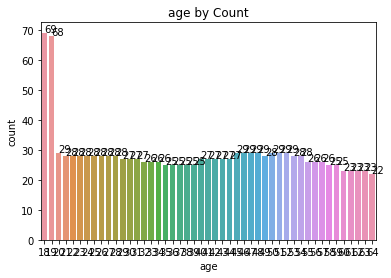

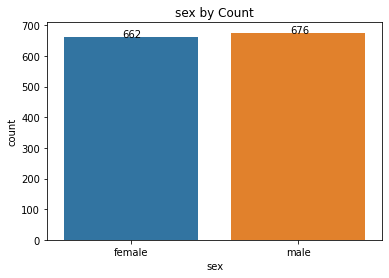

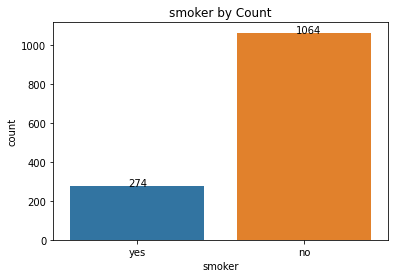

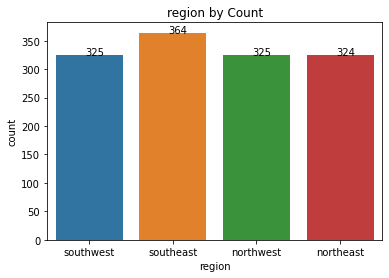

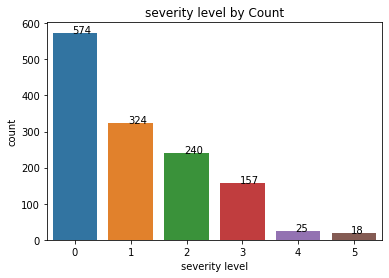

In [ ]:
# Count plot of attributes
for col in subset_df.columns:
  ax = sns.countplot(data=subset_df, x=col)
  plt.title(f"{col} by Count")
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.show()
  print()


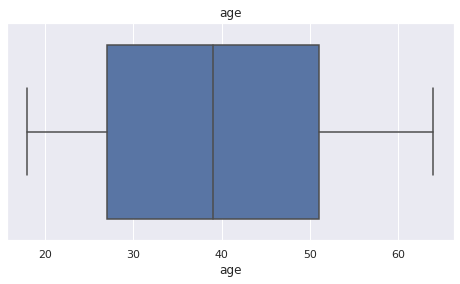

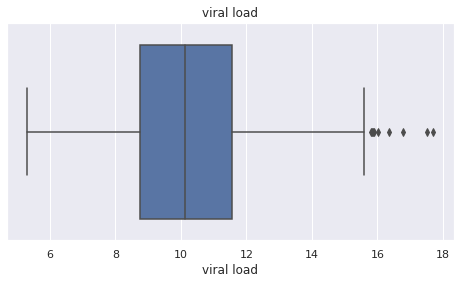

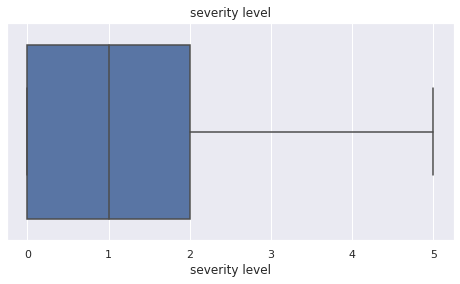

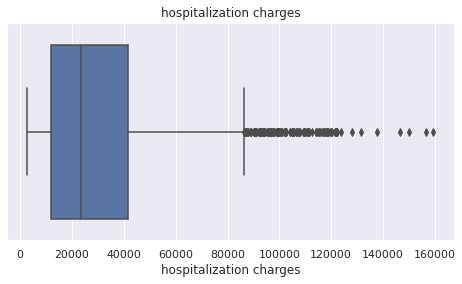

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8,4)})

for col in num_features:
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  plt.show()

#### **Observation**: *The above charts indicate, we have outliers for 'viral load' and 'hospitalization charges'*

#### Outlier Treatment

In [ ]:
# Remove the columns from the Numerical Features list where we don't have any outliers
num_features.remvoe('age')
num_features.remove('severity level')

In [44]:
# Treat outliers for the numerical features where outliiers present
for i, j in enumerate(num_features):
  q1 = work_df[j].quantile(0.25)
  q3 = work_df[j].quantile(0.75)
  iqr = q3 - q1
  work_df = work_df[(work_df[j] >=  q1 - 1.5*iqr) & (work_df[j] <= q3 + 1.5*iqr)]
  # work_df = work_df[(work_df[j] >=  q1 - 1.5*iqr) & (work_df[j] <= q3 + 1.5*iqr)]

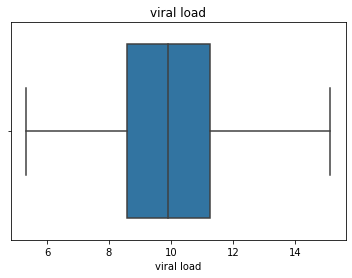

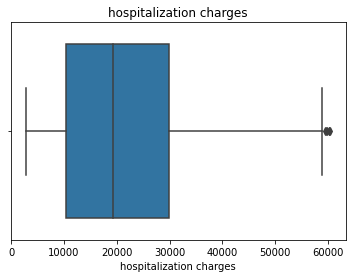

In [45]:
# Plots post outlier treatment
for col in num_features:
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  plt.show()

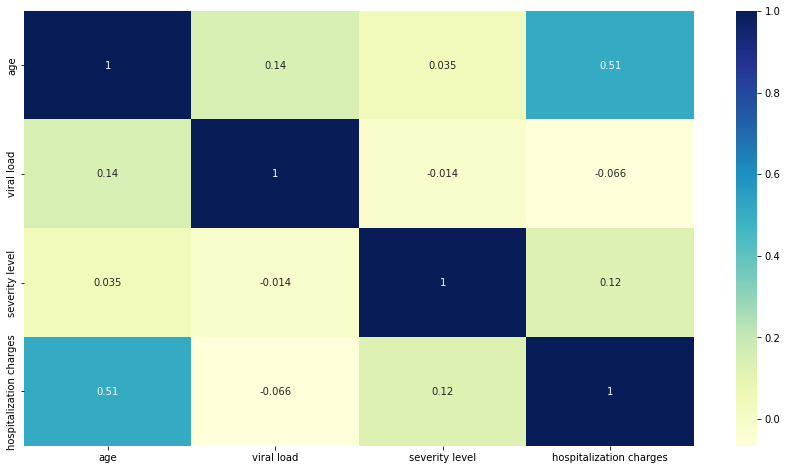

In [52]:
# Check for Correlation
plt.figure(figsize=(15,8))
sns.heatmap(work_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### **Observation**: *Notably, there is a high correlatioin b/w Age & Hospitalization Charges*

In [102]:
work_df['age_bins'] = pd.cut(x=work_df['age'], bins = [0, 18, 35, 50, 70, 100], labels = ['0-18', '18-35', '35-50', '50-70', '70-100'])
work_df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-35
1,18,male,no,southeast,11.26,1,4314,0-18
2,28,male,no,southeast,11.00,3,11124,18-35
3,33,male,no,northwest,7.57,0,54961,18-35
4,32,male,no,northwest,9.63,0,9667,18-35


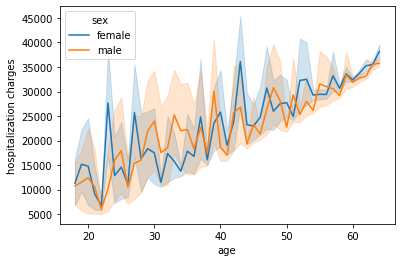

In [55]:
sns.lineplot(x='age', y='hospitalization charges', data=work_df, hue='sex')

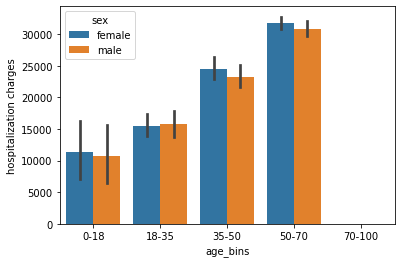

In [57]:
sns.barplot(x='age_bins', y='hospitalization charges', data=work_df, hue='sex')

#### **Observation**: *It is evident from the above graphs that hospitalization charges increase with the age and that too in women segment*

In [69]:
work_df.groupby(['region', 'sex', 'smoker']).mean()['hospitalization charges'].unstack()

smoker                      no           yes
region    sex                               
northeast female  22013.256000  46492.823529
          male    19633.533333  46155.153846
northwest female  20019.523077  48740.166667
          male    18420.714286  48740.666667
southeast female  18421.461538  49618.000000
          male    17718.819672  48649.357143
southwest female  18842.235294  45495.000000
          male    18778.569106  48505.833333

In [92]:
# Hospitalization charges max by region by sex and by smoking habit
hosp_charge_max_by_region = work_df.groupby(['region', 'sex', 'smoker']).max()['hospitalization charges'].sort_values().unstack()
hosp_charge_max_by_region

smoker               no    yes
region    sex                 
northeast female  58222  60267
          male    58104  56155
northwest female  60149  59719
          male    56234  59918
southeast female  55481  60452
          male    58908  55545
southwest female  50444  56196
          male    57707  58921

In [94]:
# Hospitalization charges min by region by sex and by smoking habit
hosp_charge_min_by_region = work_df.groupby(['region', 'sex', 'smoker']).min()['hospitalization charges'].sort_values().unstack()
hosp_charge_min_by_region

smoker              no    yes
region    sex                
northeast female  5491  35709
          male    4237  32074
northwest female  5293  36779
          male    4053  39545
southeast female  4019  41444
          male    2805  42608
southwest female  4319  34611
          male    3104  39552

### Hypothesis Testing

In [123]:
# Hypothesis 1 - Hospitalization of people who are smokers is greater than the non-smokers
work_df.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1012.0,19229.271739,11641.575233,2805.0,9692.0,17880.0,27420.75,60149.0
yes,99.0,47808.929293,6808.260660,32074.0,42830.0,47769.0,53103.50,60452.0


In [142]:
smoker_sample = df[df['smoker']=='yes']['hospitalization charges'].sample(200)
smoker_sample.mean()

79251.625

In [138]:
non_smoker_sample = df[df['smoker']=='no']['hospitalization charges'].sample(200)
non_smoker_sample.mean()

20853.475

In [146]:
alpha = 0.05
t_stat, p_val = stats.ttest_ind(smoker_sample, non_smoker_sample, equal_var=False)
p_val_onetail = p_val/2
print("Test Statistic = {}, P-Value = {}, One Tail P-Value = {}".format(t_stat, p_val, p_val_onetail))

Test Statistic = 25.985517058309043, P-Value = 1.2856888485504172e-78, One Tail P-Value = 6.428444242752086e-79


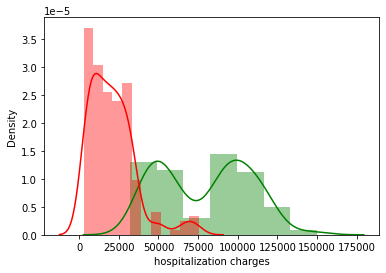

In [160]:
sns.distplot(smoker_sample, color='green')
sns.distplot(non_smoker_sample, color='red')

In [150]:
work_df.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,569.0,9.952285,1.944578,5.60,8.58,9.860,11.1800,15.11
male,542.0,10.003653,1.931349,5.32,8.58,9.935,11.2975,15.14


In [154]:
male_sample = work_df[work_df['sex']=='male']['viral load'].sample(500)
male_sample.mean()

10.00456

In [155]:
female_sample = work_df[work_df['sex']=='female']['viral load'].sample(500)
female_sample.mean()

9.932540000000001

In [156]:
alpha = 0.05
t_stat, p_val = stats.ttest_ind(male_sample, female_sample)
print("Test Statistic = {}, P-Value = {}".format(t_stat, p_val))

Test Statistic = 0.5873350254517844, P-Value = 0.5571115729735066


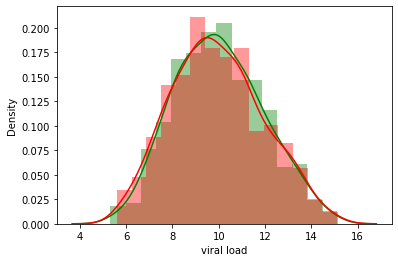

In [159]:
sns.distplot(male_sample, color='green')
sns.distplot(female_sample, color='red')

### Chi-Squared Test

In [161]:
contingency = pd.crosstab(work_df.region, work_df.smoker)
contingency

smoker,no,yes
region,,
northeast,245,30
northwest,256,24
southeast,252,25
southwest,259,20


In [164]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction=False)
print("Chi Square Statistic: {}, P-Value: {}, Degree of Freedom: {}, Expected Frequency: {}".format(chi2, p_val, dof, exp_freq))

Chi Square Statistic: 2.4405695065730537, P-Value: 0.4861273033841945, Degree of Freedom: 3, Expected Frequency: [[250.4950495   24.5049505 ]
 [255.04950495  24.95049505]
 [252.31683168  24.68316832]
 [254.13861386  24.86138614]]


### ANOVA Test

In [165]:
work_df[work_df['sex']=='female'].groupby('severity level')['viral load'].describe().head()

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,249.0,10.016426,1.962150,5.76,8.6300,9.870,11.3000,14.92
1,138.0,9.822609,1.854912,5.60,8.5850,9.655,11.0100,15.11
2,98.0,9.879184,2.012418,5.73,8.2550,10.010,11.1650,14.45
3,68.0,10.042353,1.968850,6.33,8.6075,10.035,11.3175,14.90
4,9.0,10.681111,1.906321,8.53,9.6000,9.770,11.2300,13.82


In [211]:
# female_severity_df = work_df[work_df['sex']=='female'].loc[work_df[work_df['sex']=='female']['severity level']<=2]
female_severity_df = work_df[work_df['sex']=='female'].loc[work_df[work_df['sex']=='female']['severity level']<=2]
female_severity_df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-35
5,31,female,no,southeast,8.58,0,9392,18-35
6,46,female,no,southeast,11.15,1,20601,35-50
13,56,female,no,southeast,13.27,0,27727,50-70
16,52,female,no,northeast,10.26,1,26993,50-70


In [171]:
from scipy.stats import shapiro
w, p_val = shapiro(female_severity_df['viral load'])
print("P-Value is: ", p_val)


P-Value is:  0.018467284739017487


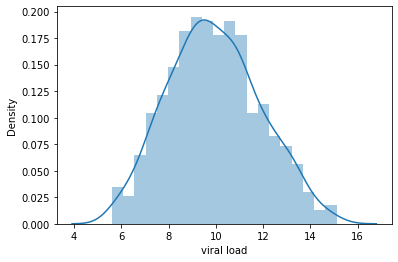

In [178]:
sns.distplot(female_severity_df['viral load'], bins=20)

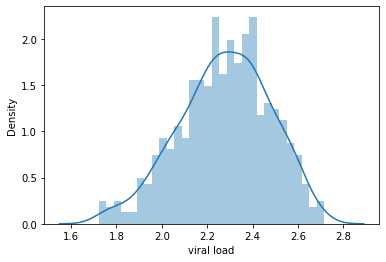

In [181]:
import numpy as np
sns.distplot(np.log(female_severity_df['viral load']), bins=30)

In [183]:
w, p_val = shapiro(np.log(female_severity_df['viral load']))
print('P-Value is: ', p_val)

P-Value is:  0.0018478847341611981


In [218]:
from scipy.stats import levene
statistics, p_val = levene(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100), 
                           female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                           female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))

if p_val > alpha:
  print("We do not reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

We do not reject the null hypothesis


In [223]:
from scipy.stats import f_oneway

test_stat, p_val = f_oneway(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100), 
                            female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                            female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
if p_val > alpha:
  print("We do not reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

We do not reject the null hypothesis
